In [84]:
import numpy as np
import matplotlib.pyplot as plt

import mne
from scipy.stats import ttest_rel, ttest_1samp, ttest_ind, kstest, wilcoxon
import statsmodels.api as sm
import statsmodels.formula.api as smf

import glob
import os

import pickle
import sys

sys.path.append('../utils')
from ERP_utils import *

In [85]:
from statsmodels.stats.anova import AnovaRM 
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

In [86]:
#-----------------------------
#           PARAMETERS
#-----------------------------
good_error_subjects = ['01', '04', '05', '06', '07', '08', '09', '10','11', '12']
nonmusicians = ['01', '04', '05', '08', '09', '10', '11']
musicians = ['02', '06', '07', '12']


task = 'error'

mus_idx = [3, 4, 9]
nmus_idx = [0, 1, 2, 5, 6, 7, 8]

subjects_to_process = good_error_subjects
subjects_to_process_int = [int(x) for x in subjects_to_process]

In [157]:
#-----------------------------
#           DIRECTORIES
#-----------------------------

evoked_dir = f'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_{task}/{task}_ERP_data'
epochs_dir = f'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_{task}/{task}_epochs_data'
figs_dir = '/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/figures'

#get channel names
with open('../utils/ch_names.pkl', 'rb') as file:
    ch_names_all = pickle.load(file)

ch_names_72 = ch_names_all[0:72]
downfreq = 128

In [88]:
#-----------------------------
#           GROUPING EVOKEDS
#-----------------------------

conditions = ['all', 'norm', 'shinv', 'inv']
periods = ['pre', 'post']

evokeds = {cond: [] for cond in conditions}
epochs = {cond: {'pre': [], 'post': []} for cond in conditions}

for subject in subjects_to_process:
    print('Processing subject:', subject)
    
    for cond in conditions:
        for period in periods:
            file_evoked = glob.glob(os.path.join(evoked_dir, f'error_ERP_{cond}_{period}_{subject}.fif'))[0]
            evoked = mne.read_evokeds(file_evoked)[0]
            evokeds[cond].append(evoked)
            
            file_epochs = glob.glob(os.path.join(epochs_dir, f'error_epochs_{cond}_{period}_{subject}.fif'))[0]
            epochs[cond][period].append(mne.read_epochs(file_epochs))

# Combine Evokeds
evokeds_ga = {cond: mne.combine_evoked(evokeds[cond], weights='equal') for cond in conditions}

# Concatenate Epochs
concat_epochs = {cond: {period: mne.concatenate_epochs(epochs[cond][period]) for period in ['pre', 'post']} for cond in conditions}

# Combine Evokeds for Pre and Post Data
concat_evoked = {period: {cond: mne.combine_evoked(evokeds[cond], weights='equal') for cond in conditions} for period in ['pre', 'post']}


Processing subject: 01
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_all_pre_01.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (2)
        0 CTF compensation matrices available
        nave = 289 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_all_pre_01.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
289 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_all_post_01.fif ...
    Found the data of interest:
        t =    -203.12 ...     

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_25073/4207397750.py:17: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_all_pre_01.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked = mne.read_evokeds(file_evoked)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_25073/4207397750.py:21: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_all_pre_01.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[cond][period].append(mne.read_epochs(file_epochs))
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_25073/4207397750.py:17: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ER

    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
189 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_all_post_04.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (2)
        0 CTF compensation matrices available
        nave = 367 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_all_post_04.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
367 matching events found
No baseline correction applied
0 projecti

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_25073/4207397750.py:17: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_all_post_04.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked = mne.read_evokeds(file_evoked)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_25073/4207397750.py:21: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_all_post_04.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[cond][period].append(mne.read_epochs(file_epochs))
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_25073/4207397750.py:17: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_

No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_shinv_pre_05.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (2)
        0 CTF compensation matrices available
        nave = 69 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_shinv_pre_05.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
69 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_shinv_post_05.fif ...
    Found the data of 

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_25073/4207397750.py:17: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_shinv_pre_05.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked = mne.read_evokeds(file_evoked)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_25073/4207397750.py:21: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_shinv_pre_05.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[cond][period].append(mne.read_epochs(file_epochs))
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_25073/4207397750.py:17: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/erro

0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_inv_post_06.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (2)
        0 CTF compensation matrices available
        nave = 189 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_inv_post_06.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
189 matching events found
No baseline correction applied
0 projection items activated
Processing subject: 07
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_all_pre_07.fif ...
    Found the data of interest:
 

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_25073/4207397750.py:17: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_inv_post_06.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked = mne.read_evokeds(file_evoked)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_25073/4207397750.py:21: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_inv_post_06.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[cond][period].append(mne.read_epochs(file_epochs))
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_25073/4207397750.py:17: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_

No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_inv_pre_07.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (2)
        0 CTF compensation matrices available
        nave = 186 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_inv_pre_07.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
186 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_inv_post_07.fif ...
    Found the data of inte

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_25073/4207397750.py:17: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_inv_pre_07.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked = mne.read_evokeds(file_evoked)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_25073/4207397750.py:21: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_inv_pre_07.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[cond][period].append(mne.read_epochs(file_epochs))
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_25073/4207397750.py:17: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ER

Not setting metadata
169 matching events found
No baseline correction applied
0 projection items activated
Processing subject: 09
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_all_pre_09.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (2)
        0 CTF compensation matrices available
        nave = 394 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_all_pre_09.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
394 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/e

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_25073/4207397750.py:17: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_all_pre_09.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked = mne.read_evokeds(file_evoked)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_25073/4207397750.py:21: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_all_pre_09.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[cond][period].append(mne.read_epochs(file_epochs))
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_25073/4207397750.py:17: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ER

No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_norm_pre_10.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
79 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_norm_post_10.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (2)
        0 CTF compensation matrices available
        nave = 72 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_25073/4207397750.py:21: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_norm_pre_10.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[cond][period].append(mne.read_epochs(file_epochs))
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_25073/4207397750.py:17: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_norm_post_10.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked = mne.read_evokeds(file_evoked)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_25073/4207397750.py:21: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error

0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_shinv_post_11.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (2)
        0 CTF compensation matrices available
        nave = 101 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_shinv_post_11.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_inv_pre_11.fif ...
    Found the data of interest:
        t =    -203.

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_25073/4207397750.py:17: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_shinv_post_11.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked = mne.read_evokeds(file_evoked)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_25073/4207397750.py:21: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_shinv_post_11.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[cond][period].append(mne.read_epochs(file_epochs))
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_25073/4207397750.py:17: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/er

Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_inv_post_12.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (2)
        0 CTF compensation matrices available
        nave = 182 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_inv_post_12.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
182 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3152 matching events found
Applying baseline correction (mode: mean)


/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_25073/4207397750.py:21: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_inv_post_12.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[cond][period].append(mne.read_epochs(file_epochs))


Not setting metadata
3501 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
842 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
931 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
737 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
823 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
1578 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
1752 matching events found
Applying baseline correction (mode: mean)


### Calculating differences between pre and post

### Experiment-specific parameters

In [227]:
#choosing the timepoint to run ANOVA over
timepoint  = 0.38
erp_times = concat_epochs['all']['pre'].times
time_idx = min(range(len(erp_times)), key=lambda i: abs(erp_times[i] - timepoint))

#channels to average over
p_channels = ['Cz', 'FCz']
eeg_channels = ch_names_72[0:64]
p_ch_idx = ch_index(p_channels)

In [228]:
""" 

Takes a list of epochs (with data from all subjects), the list of subjects to include expressed as indices, and timestep to calculate on
Finds the eeg voltage at a certain timepoint, averaged over trials and all channels
Returns one value per subject
"""
#this version also adds the name of the subject

def ep_slices(epochs_list, subject_list, time_idx, map, period):
    ep_slices = []
    for i, subject in enumerate(subject_list):
        if subject in mus_idx:
            musician = 1
        else:
            musician = 0
        epoch_curr = epochs_list[subject].get_data()[:, p_ch_idx, time_idx]
        mean_epoch = epoch_curr.mean(axis=(0, 1))  # Average over trials and channels.
        # Concatenate subject column with mean_epoch array
        ep_slices.append([int(subject), mean_epoch, map, period, musician])
    ep_slices = np.array(ep_slices)
    return ep_slices

In [229]:
data = []
for map in conditions:
    for period in periods:
        data_temp = ep_slices(concat_epochs[map][period], subjects_to_process_int, time_idx, map, period)
        data.append(data_temp)

#concatenate all arrays
data = np.concatenate(data, axis=0)

#make into dataframe
df = pd.DataFrame(data, columns = ['subject', 'eeg', 'map', 'period', 'musician'])
df['eeg'] = pd.to_numeric(df['eeg'])

In [230]:
#mixed-effects model
mixed_model = smf.mixedlm("eeg ~ C(period) * C(musician) * C(map)", df, groups = df['subject'])
mixed_results = mixed_model.fit()
print(mixed_results.summary())

/Users/cindyzhang/anaconda3/envs/eelbrain-cnsp/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/cindyzhang/anaconda3/envs/eelbrain-cnsp/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/cindyzhang/anaconda3/envs/eelbrain-cnsp/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/cindyzhang/anaconda3/envs/eelbrain-cnsp/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(


                           Mixed Linear Model Regression Results
Model:                          MixedLM             Dependent Variable:             eeg     
No. Observations:               80                  Method:                         REML    
No. Groups:                     10                  Scale:                          0.0000  
Min. group size:                8                   Log-Likelihood:                 665.2361
Max. group size:                8                   Converged:                      No      
Mean group size:                8.0                                                         
--------------------------------------------------------------------------------------------
                                                  Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------------------------
Intercept                                         -0.000    0.000 -0.639 0.523 -0.000  0.000
C(per

/Users/cindyzhang/anaconda3/envs/eelbrain-cnsp/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/cindyzhang/anaconda3/envs/eelbrain-cnsp/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2207: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
/Users/cindyzhang/anaconda3/envs/eelbrain-cnsp/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2219: ConvergenceWarning: Gradient optimization failed, |grad| = 0.375802
  warnings.warn(msg, ConvergenceWarning)
/Users/cindyzhang/anaconda3/envs/eelbrain-cnsp/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


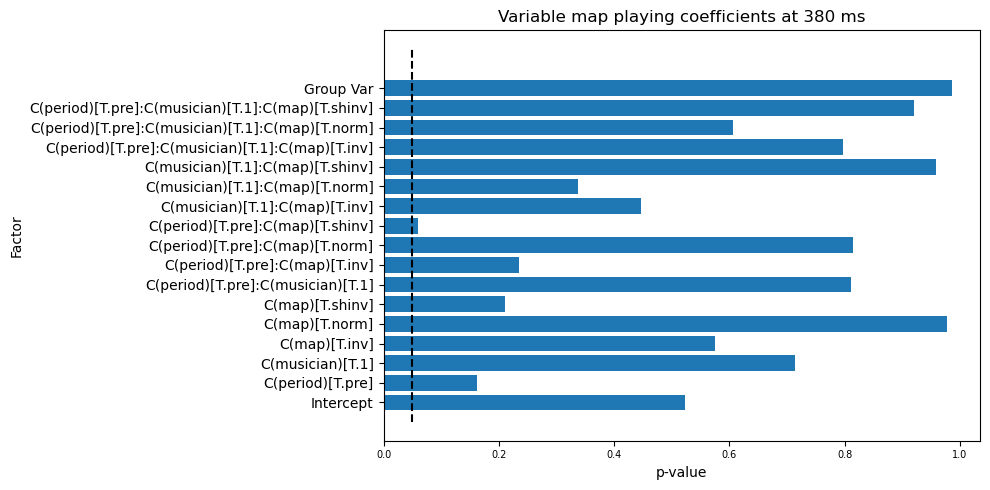

In [231]:
plt.figure(figsize=(10,5))
plt.barh(mixed_results.pvalues.index, mixed_results.pvalues.values)
plt.xlabel('p-value')
plt.ylabel('Factor')
plt.xticks(fontsize = 7)
plt.vlines(0.05, -1, 18, color = 'black', linestyles= '--')
plt.title(f'Variable map playing coefficients at {int(timepoint*1000)} ms')
plt.tight_layout()
plt.savefig(f'{figs_dir}/error_ME_coefs_{int(timepoint*1000)}.png')